In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload("saleOfShampoo.csv")

file_name = list(uploaded.keys())[0]
shampoo_sales_data = pd.read_csv(file_name)

# Rename columns for easier handling
shampoo_sales_data.columns = ['Month', 'Sales']

# Convert 'Month' to a datetime object and handle missing or incorrect data
shampoo_sales_data['Month'] = pd.to_datetime(shampoo_sales_data['Month'], format='%d-%b', errors='coerce')
shampoo_sales_data['Sales'] = pd.to_numeric(shampoo_sales_data['Sales'], errors='coerce')

# Drop rows with invalid data
shampoo_sales_data.dropna(inplace=True)

# Reset index
shampoo_sales_data = shampoo_sales_data.reset_index(drop=True)


Saving sales-of-shampoo-over-a-three-ye (1).csv to saleOfShampoo.csv/sales-of-shampoo-over-a-three-ye (1).csv


Mean Squared Error: 5950.776705352398
R-squared: 0.7990326207942156


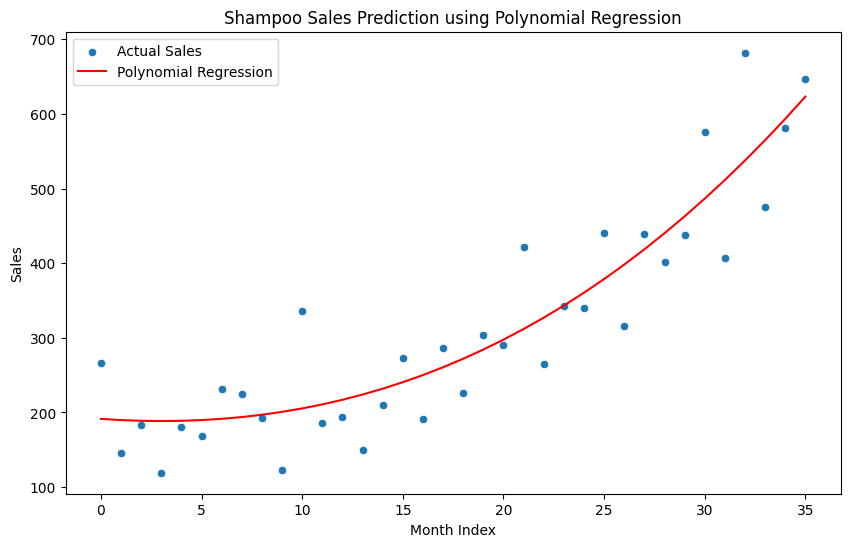

In [8]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

# Transform the data to include polynomial features
poly = PolynomialFeatures(degree=3)  # Degree 3 as an example, can tune this
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the linear regression model on the transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.flatten(), y=y, label='Actual Sales')
plt.plot(X.flatten(), model.predict(poly.transform(X)), color='red', label='Polynomial Regression')
plt.xlabel('Month Index')
plt.ylabel('Sales')
plt.title('Shampoo Sales Prediction using Polynomial Regression')
plt.legend()
plt.show()
